# Image processing
# Lab II - Neighbourhood operations. Linear Filtering

## 1.Neighbourhood operations
During previous lectures, you learned about improving images by modifying each pixel individually (without taking into account where it is positioned). Neighbourhood operation take into account the values surrounding our pixel of interest.

Let $f(l,c)$ be the initial input image, $g(l,c)$ be the processed output image and $T$ be an operator on $f$, defined over some neighborhood of pixel $(l,c)$. The new value of any pixel within the processed image is obtained by combining  some pixel values from the initial image, placed around (in the neighborhood of) the current processed pixel. The center of the neighborhood is moved from pixel to pixel spanning the whole image. The operator $T$ is a function that combines the values extracted from the image. $T$ is applied at each location $(l,c)$ to yield the output, $g(l,c)$, at that location. The process utilizes only the pixels in the area of the image spanned by the neighborhood.
<img src="Neighbour1.png"><center>How neighbourhood operations take into account surrounding pixels</center>

In order to define the transform, the <b>shape of the neighbourhood</b> of the current processed pixel $V_{(l,c)}$ and the <b>operator $T$</b> need to be defined.

Defining the neighborhood means specifying the locations of pixels belonging to that neighborhood, with respect to the current location, i.e. the current processed pixel located at $(l,c)$. The neighborhood $V_{(l,c)}$ is:
$$V_{(l,c)} = \{(m_1,n_1),(m_2,n_2),...,(m_k,n_k)\}$$
where $(m_i,n_i)$ are the relative coordinates with respect to the current pixel $(l,c)$. The current processed location $(l,c)$ is the origin of the coordinate system attached to the neighborhood.

<img src="v84.png"><center>Examples of neighbourhoods</center>

In image coordinates (considering the origin as the origin of the image) the neighborhood can be written as:
$$V_{(l,c)} = \{(l+m_1,c+n_1),(l+m_2,c+n_2),...,(l+m_k,c+n_k)\}$$
and the neibhourhood operation becomes:
$$g(l,c) = T(f(l+m_1,c+n_1),f(l+m_2,c+n_2),...,f(l+m_k,c+n_k))$$

## 2. Linear filtering of images
If $T$ is a linear function, then the transform is called <b>linear filtering</b> and is written as:
$$g(l,c) = \sum_{(m,n)\epsilon V}w_{mn}f(m+l,n+c)$$
where $w_{mn}$ are scalar constants called the <b>coefficients (or weights)</b> of the filter.

<b>Taking this into account, linear filtering is actually a weighted sum of the pixels found in the neighbourhood of the current pixel.</b>

Depending on the chosen weights, the result of the filter will differ. To simplify things, when defining a linear filter, we will use a matrix (called the <b>mask</b>) of the form of the neighbourhood that contains the coefficients of the filter. <img src="mask.png"><center>The mask of a 3x3 neighbourhood filter</center>

## 3.1. Linear smoothing filters
Smoothing filters are used to increase the uniformity of the pixels in a region, thus decreasing small variations, which can be caused by noise. In that sense, smoothing filters are used to decrease (certain types of) noise in images.
The most common type of noise is the Gaussian, white, additive noise, independent to the image pixels. Usually for this type of noise the mean is considered to be 0. 

### Exercise 1. Read an image. Generate white, Gaussian noise, 0 mean and different standard deviations. Add the noise to the image. Observe the effects.

The function used to create Gaussian noise of the same size as the image is: ```N = np.random.normal(0,standard_deviation,(rows,columns))```

<b>HINT: When applying <i>color.rgb2gray(img)</i> the output image is scaled in $0...1$. We need to scale it back to $0...255$</b>


ValueError: operands could not be broadcast together with shapes (5,5) (4,4) 

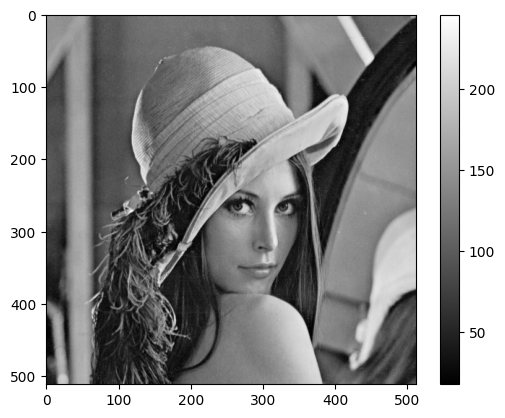

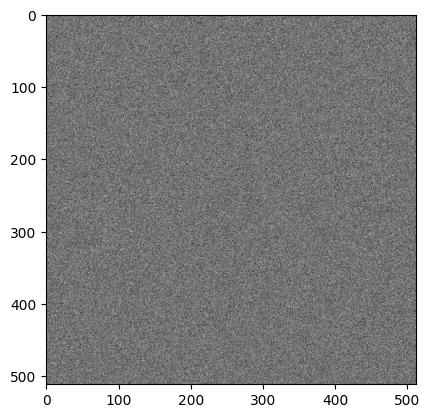

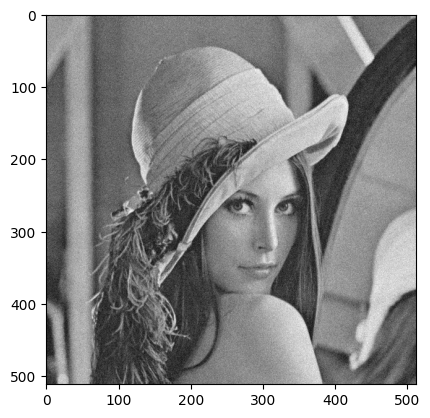

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

img = io.imread('lena.png')

img = color.rgb2gray(img)

#scale to 0-255
img = np.uint8(img * 255)

plt.figure()
plt.imshow(img, cmap = 'gray')
plt.colorbar()

#create & apply white noise
sigma = 10
N = np.random.normal(0, sigma, (img.shape[0], img.shape[1]))

plt.figure()
plt.imshow(N, cmap = 'gray')

img_noise = img + N

plt.figure()
plt.imshow(img_noise, cmap = 'gray')

mask_size = 31
mask = np.ones([mask_size, mask_size]) / mask_size**2

h, w = img.shape
img_filtered = np.zeros([h, w])

for i in range(mask_size // 2, h - mask_size // 2):
    for j in range(mask_size // 2, w - mask_size // 2):
        V = img_noise[i - mask_size // 2:i + (mask_size // 2 + 1), j - mask_size // 2:j + (mask_size // 2 + 1)]
        V = V * mask
        img_filtered[i, j] = np.sum(V)

plt.figure()
plt.imshow(img_filtered, cmap = 'gray')

The optimal filter for this type of noise is the simple, averaging filter where the coefficients of the filter are:
$$ w_{mn} = \frac{1}{Card(V)}$$

### Exercise 2. Read an image. Write a function that implements an average filter on a 3x3 neighbourhood (the filter coefficients should all ve equal to $\frac{1}{9}$).

### Exercise 3. Write a function that implements an average filter on a square neighborhood with the size of the square being given by the user.